# Machine Learning

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Double Checking The Data

In [3]:
df = pd.read_csv('hotel_final.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,hotel_encoded,booking_location_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Internation,0,0,0,0,1


In [4]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
adults                              0
meal                                0
country                           478
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_status_date             0
arrival_date

In [5]:
df['booking_location_encoded'] =df['booking_location'].map({'International':1, 'Local':0})
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

# preprocessing label using .map because there are only 2 unique values

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,hotel_encoded,booking_location_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Internation,0,0,0,0,NaN


In [7]:
import dython
from dython.nominal import associations



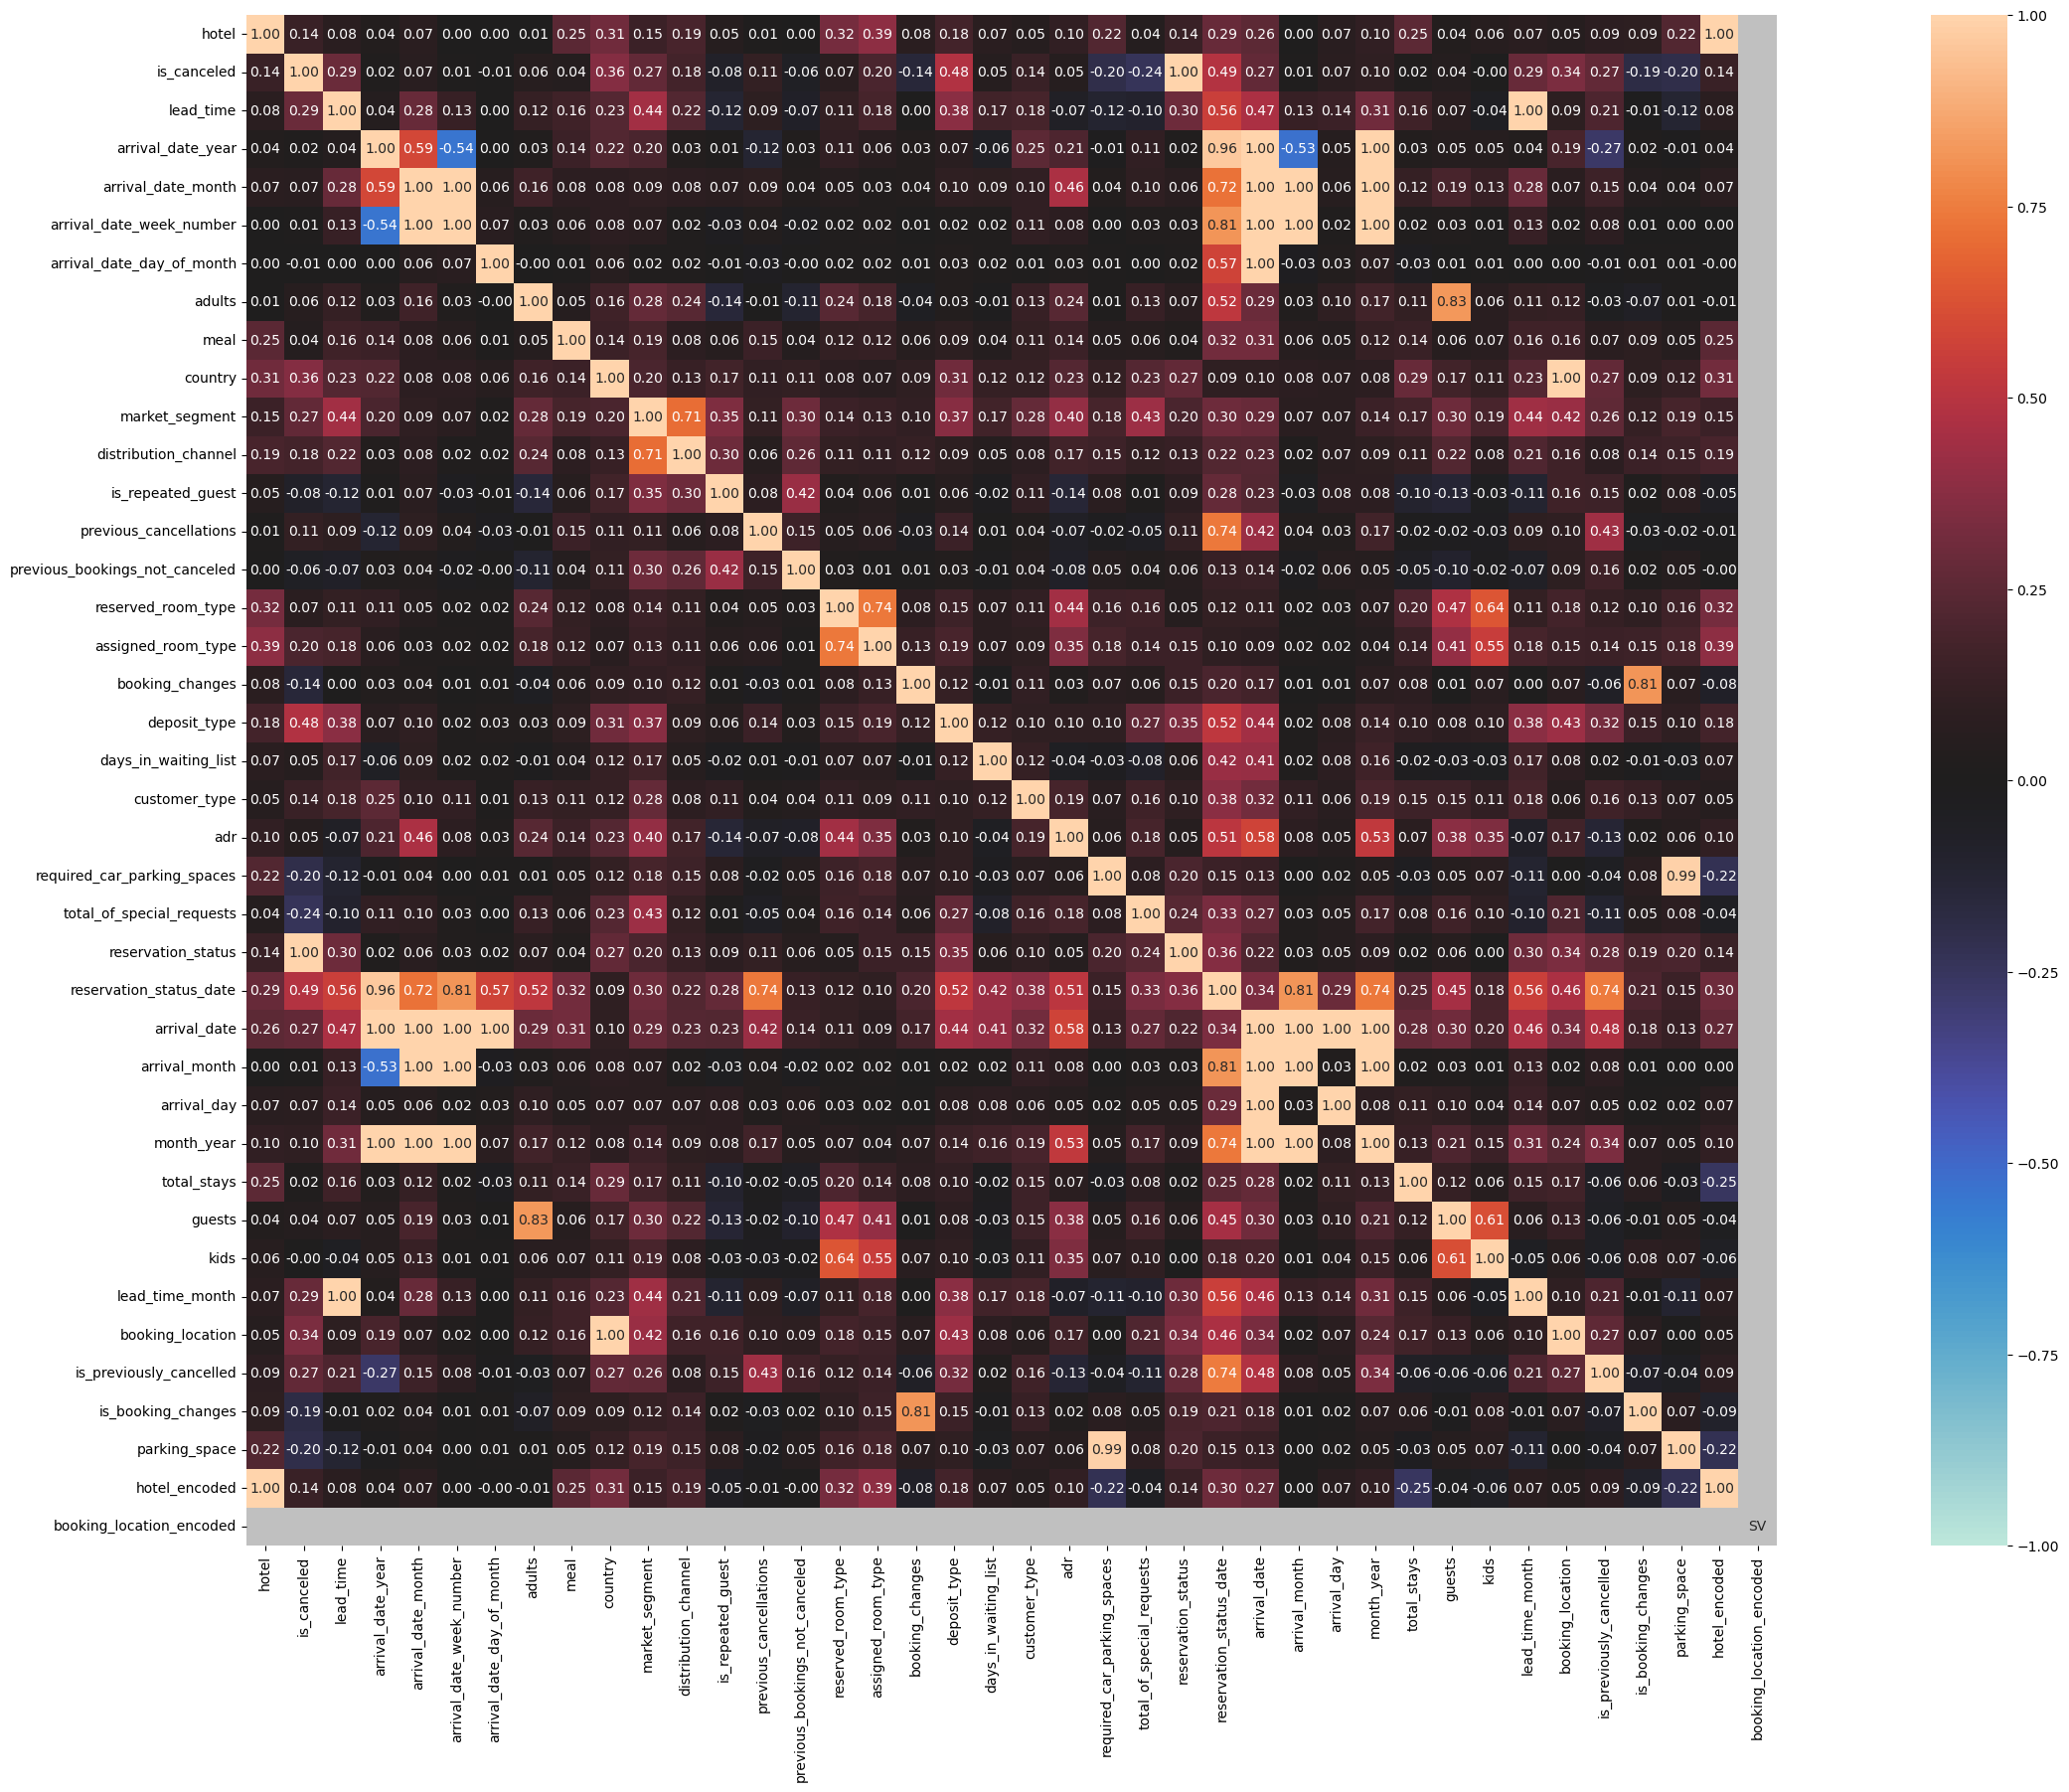

In [8]:
associations(df, figsize = (40, 20))
plt.show()

# we se that iscanceled have 1.00 cancellation have 1.00 correlation with reservationn status so will not use reservation status
# as reservation status tell you is the booking already canceled or check out or no show 
# and reservation status date will be dropped as well as our goals is to predict

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,hotel_encoded,booking_location_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Internation,0,0,0,0,NaN


- lead time = 0.29
    - numerical
    
    
- booking location = 0.33
    - label categorical (binary)
   


- country = 0.36
    - categorical one hot encoding
    
    
- market segment = 0.27
    - categorical one hot encoding


- deposit type = 0.48
    - categorical one hot encoding


- parking_space = -0.2
    - numerical encoding
    
    

- total_special_request = -0.24
    - numerical

- is previously cancelled = 0.27
    - numerical

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,hotel_encoded,booking_location_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Internation,0,0,0,0,NaN
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Internation,0,0,0,0,NaN


## Model Building

In [11]:
X = df[['hotel_encoded','booking_location_encoded','lead_time', 'market_segment', 'deposit_type', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'customer_type', 'total_stays', 'guests']]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [12]:
X_train.head()

,hotel_encoded,booking_location_encoded,lead_time,market_segment,deposit_type,parking_space,total_of_special_requests,is_previously_cancelled,is_repeated_guest,is_booking_changes,customer_type,total_stays,guests
111811,1,0.0,30,Direct,No Deposit,0,1,0,0,1,Transient,1,3.0
18678,0,0.0,15,Corporate,No Deposit,0,0,1,0,0,Transient-Party,2,2.0
25566,0,NaN,160,Offline TA/TO,No Deposit,0,0,0,0,0,Transient,7,2.0
52665,1,NaN,88,Online TA,No Deposit,0,0,0,0,0,Transient,3,2.0
88106,1,0.0,56,Complementary,No Deposit,0,0,0,0,0,Transient,1,2.0


In [13]:
cat_columns = ['market_segment','deposit_type','customer_type']
num_columns = ['hotel_encoded','booking_location_encoded','lead_time', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'total_stays', 'guests']

In [32]:
'''categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])

# this is preparring all the the pipeline model to predict all using few algorithm and we will hypertune it using
# the algorithm that we set up as well '''
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# categorical pipeline (impute missing with most frequent, then one-hot encode)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# numerical pipeline (impute missing with median, then scale)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# combine both
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, cat_columns),
    ('numerical', numerical_pipeline, num_columns)
])

# different model pipelines
pipe_logreg = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression(max_iter=1000))
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


### Logistic Regression

In [50]:
# Dictionary of model pipelines
models = {
    "Logistic Regression": pipe_logreg,
    "KNN": pipe_KNN,
    "Random Forest": pipe_RF,
    "Decision Tree": pipe_DT,
    "XGBoost": pipe_XGB
}

model_name = "Logistic Regression"
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)




Logistic Regression Accuracy: 0.805353616002017
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     14974
           1       0.83      0.60      0.69      8823

    accuracy                           0.81     23797
   macro avg       0.81      0.76      0.78     23797
weighted avg       0.81      0.81      0.80     23797



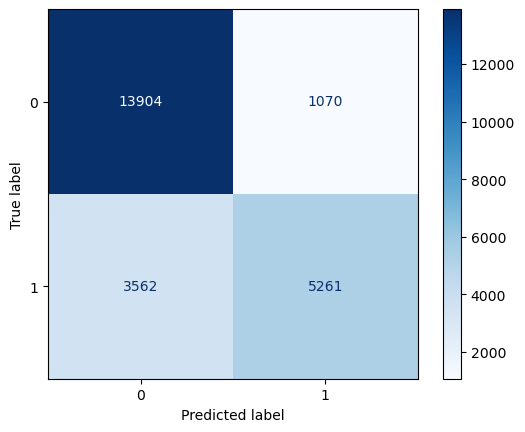

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Accuracy and classification report
acc = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy:", acc)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
results = {}
results[model_name] = {
    "accuracy": acc,
    "report": classification_report(y_test, y_pred, output_dict=True),
    "preds": y_pred
}




In [55]:
#RANDOM FOREST

Random Forest Accuracy: 0.8180022691935959
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     14974
           1       0.77      0.72      0.75      8823

    accuracy                           0.82     23797
   macro avg       0.81      0.80      0.80     23797
weighted avg       0.82      0.82      0.82     23797



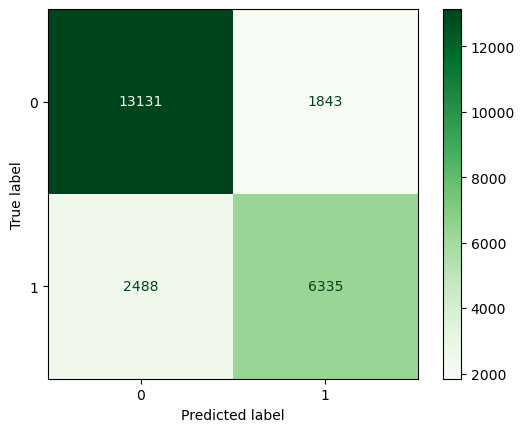

In [57]:
model_name = "Random Forest"
model = models[model_name]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
results[model_name] = {
    "accuracy": acc,
    "report": classification_report(y_test, y_pred, output_dict=True),
    "preds": y_pred
}



In [58]:
#DECISION TREE

Decision Tree Accuracy: 0.8099760474009329
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     14974
           1       0.77      0.70      0.73      8823

    accuracy                           0.81     23797
   macro avg       0.80      0.79      0.79     23797
weighted avg       0.81      0.81      0.81     23797



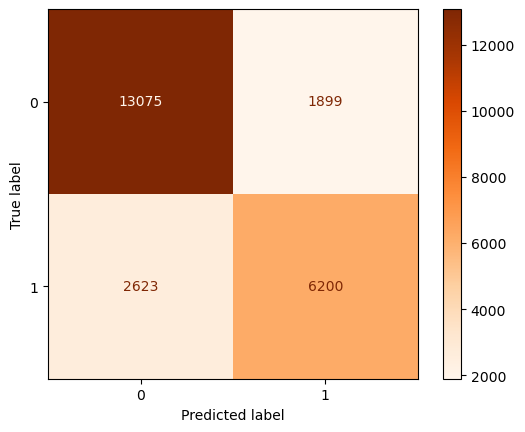

In [61]:
model_name = "Decision Tree"
model = models[model_name]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges")
results[model_name] = {
    "accuracy": acc,
    "report": classification_report(y_test, y_pred, output_dict=True),
    "preds": y_pred
}



In [ ]:
#XGBOOST

XGBoost Accuracy: 0.8293482371727529
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     14974
           1       0.84      0.67      0.74      8823

    accuracy                           0.83     23797
   macro avg       0.83      0.80      0.81     23797
weighted avg       0.83      0.83      0.82     23797



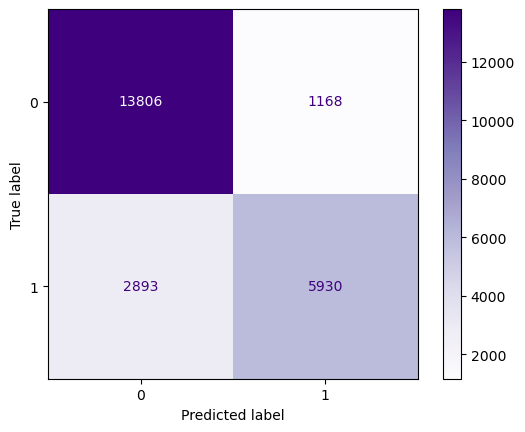

In [62]:
model_name = "XGBoost"
model = models[model_name]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
results[model_name] = {
    "accuracy": acc,
    "report": classification_report(y_test, y_pred, output_dict=True),
    "preds": y_pred
}


In [63]:
# Pick the model with highest accuracy
best_model_name = max(results, key=lambda k: results[k]["accuracy"])
best_model_acc = results[best_model_name]["accuracy"]

print(f"Best Model: {best_model_name} with accuracy: {best_model_acc:.4f}")


Best Model: XGBoost with accuracy: 0.8293


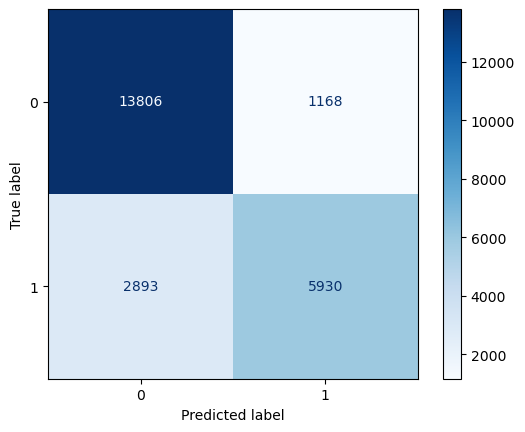

In [64]:
best_preds = results[best_model_name]["preds"]

cm = confusion_matrix(y_test, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [65]:
import pandas as pd

# Create a DataFrame with model names and accuracies
accuracy_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]["accuracy"] for m in results]
})

# Sort by accuracy descending
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(accuracy_df)


                 Model  Accuracy
0              XGBoost  0.829348
1        Random Forest  0.818002
2        Decision Tree  0.809976
3  Logistic Regression  0.805354


Confusion Matrix: Logistic Regression


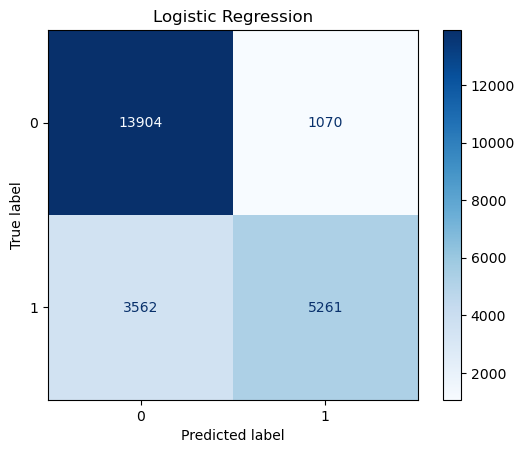

Confusion Matrix: Random Forest


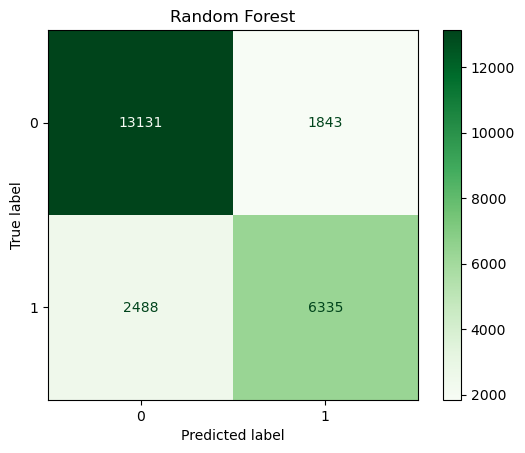

Confusion Matrix: Decision Tree


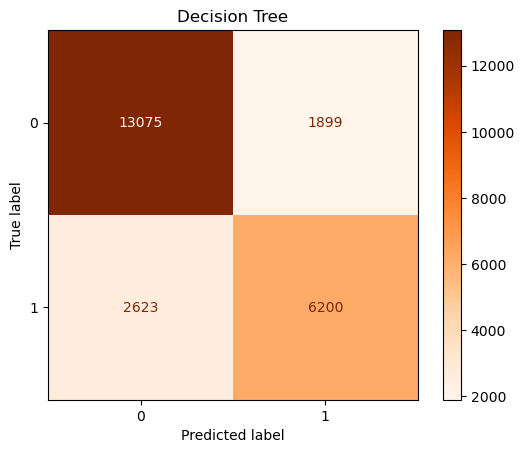

Confusion Matrix: XGBoost


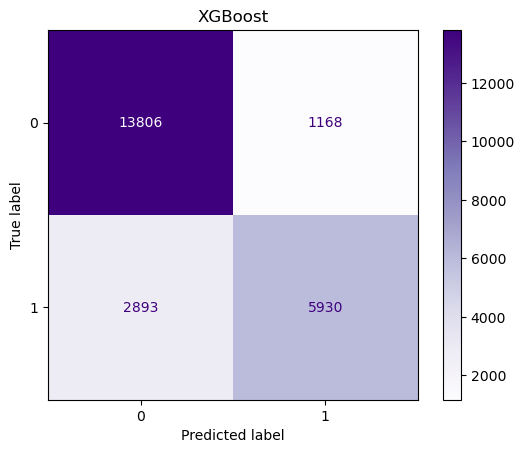

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to display (excluding KNN)
models_to_plot = ["Logistic Regression", "Random Forest", "Decision Tree", "XGBoost"]

cmap_dict = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "Decision Tree": "Oranges",
    "XGBoost": "Purples"
}

for model_name in models_to_plot:
    print(f"Confusion Matrix: {model_name}")
    
    cm = confusion_matrix(y_test, results[model_name]["preds"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot(cmap=cmap_dict[model_name])
    plt.title(model_name)
    plt.show()


### KNN

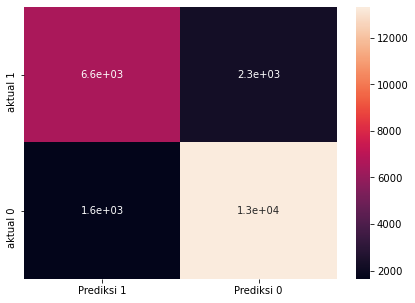

### Decision Tree

In [67]:
from sklearn.metrics import accuracy_score

train_test_acc = {}

models_to_eval = ["Logistic Regression", "Random Forest", "Decision Tree", "XGBoost"]

for model_name in models_to_eval:
    model = models[model_name]
    
    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Testing accuracy
    y_test_pred = results[model_name]["preds"]
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_test_acc[model_name] = {"train_acc": train_acc, "test_acc": test_acc}

# Convert to DataFrame for easy viewing
import pandas as pd
acc_df = pd.DataFrame(train_test_acc).T
acc_df


,train_acc,test_acc
Logistic Regression,0.807675,0.805354
Random Forest,0.922889,0.818002
Decision Tree,0.922952,0.809976
XGBoost,0.837437,0.829348


In [68]:
for model_name, acc in train_test_acc.items():
    diff = acc["train_acc"] - acc["test_acc"]
    if diff > 0.05:
        status = "Overfitting"
    elif diff < -0.05:
        status = "Underfitting"
    else:
        status = "Good Fit"
    print(f"{model_name}: Train={acc['train_acc']:.3f}, Test={acc['test_acc']:.3f}, Status={status}")


Logistic Regression: Train=0.808, Test=0.805, Status=Good Fit
Random Forest: Train=0.923, Test=0.818, Status=Overfitting
Decision Tree: Train=0.923, Test=0.810, Status=Overfitting
XGBoost: Train=0.837, Test=0.829, Status=Good Fit


In [70]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [71]:
# Logistic Regression
param_logreg = {
    'algo__C': np.logspace(-3, 3, 7),
    'algo__penalty': ['l2'],
    'algo__solver': ['lbfgs']
}

# Decision Tree
param_dt = {
    'algo__max_depth': [None, 5, 10, 20, 30],
    'algo__min_samples_split': [2, 5, 10],
    'algo__min_samples_leaf': [1, 2, 5],
    'algo__criterion': ['gini', 'entropy']
}

# Random Forest
param_rf = {
    'algo__n_estimators': [50, 100, 200],
    'algo__max_depth': [None, 5, 10, 20],
    'algo__min_samples_split': [2, 5, 10],
    'algo__min_samples_leaf': [1, 2, 4],
    'algo__bootstrap': [True, False]
}

# XGBoost
param_xgb = {
    'algo__n_estimators': [50, 100, 200],
    'algo__max_depth': [3, 5, 7, 10],
    'algo__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'algo__subsample': [0.6, 0.8, 1.0],
    'algo__colsample_bytree': [0.6, 0.8, 1.0]
}


In [72]:
def tune_model(pipe, param_grid, X_train, y_train, X_test, y_test, model_name, n_iter=20):
    rs = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=5,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    
    rs.fit(X_train, y_train)
    
    print(f"\n=== {model_name} Tuning Results ===")
    print("Best Parameters:", rs.best_params_)
    print("Best CV Accuracy:", rs.best_score_)
    print("Test Accuracy:", rs.score(X_test, y_test))
    
    return rs


In [73]:
rs_logreg = tune_model(pipe_logreg, param_logreg, X_train, y_train, X_test, y_test, "Logistic Regression", n_iter=10)


Fitting 5 folds for each of 7 candidates, totalling 35 fits

=== Logistic Regression Tuning Results ===
Best Parameters: {'algo__solver': 'lbfgs', 'algo__penalty': 'l2', 'algo__C': 100.0}
Best CV Accuracy: 0.8077698775623983
Test Accuracy: 0.8053115938983906


In [74]:
rs_dt = tune_model(pipe_DT, param_dt, X_train, y_train, X_test, y_test, "Decision Tree", n_iter=20)



Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Decision Tree Tuning Results ===
Best Parameters: {'algo__min_samples_split': 10, 'algo__min_samples_leaf': 5, 'algo__max_depth': 20, 'algo__criterion': 'gini'}
Best CV Accuracy: 0.8192314099762367
Test Accuracy: 0.8223725679707526


rs_rf = tune_model(pipe_RF, param_rf, X_train, y_train, X_test, y_test, "Random Forest", n_iter=20)


In [75]:
rs_rf = tune_model(pipe_RF, param_rf, X_train, y_train, X_test, y_test, "Random Forest", n_iter=20)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Random Forest Tuning Results ===
Best Parameters: {'algo__n_estimators': 50, 'algo__min_samples_split': 10, 'algo__min_samples_leaf': 2, 'algo__max_depth': None, 'algo__bootstrap': True}
Best CV Accuracy: 0.8319010717999396
Test Accuracy: 0.8304828339706686
[CV] END algo__C=0.001, algo__penalty=l2, algo__solver=lbfgs; total time=   2.9s
[CV] END .algo__C=0.01, algo__penalty=l2, algo__solver=lbfgs; total time=   1.8s
[CV] END ..algo__C=0.1, algo__penalty=l2, algo__solver=lbfgs; total time=   2.1s
[CV] END ..algo__C=0.1, algo__penalty=l2, algo__solver=lbfgs; total time=   1.9s
[CV] END ..algo__C=1.0, algo__penalty=l2, algo__solver=lbfgs; total time=   1.8s
[CV] END .algo__C=10.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.1s
[CV] END algo__C=100.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.0s
[CV] END algo__C=1000.0, algo__penalty=l2, algo__solver=lbfgs; total time=   3.4s
[CV] END algo__criterion=g

[CV] END algo__C=0.001, algo__penalty=l2, algo__solver=lbfgs; total time=   2.9s
[CV] END algo__C=0.001, algo__penalty=l2, algo__solver=lbfgs; total time=   1.1s
[CV] END .algo__C=0.01, algo__penalty=l2, algo__solver=lbfgs; total time=   1.8s
[CV] END ..algo__C=0.1, algo__penalty=l2, algo__solver=lbfgs; total time=   1.9s
[CV] END ..algo__C=1.0, algo__penalty=l2, algo__solver=lbfgs; total time=   1.9s
[CV] END .algo__C=10.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.1s
[CV] END .algo__C=10.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.2s
[CV] END algo__C=100.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.2s
[CV] END algo__C=1000.0, algo__penalty=l2, algo__solver=lbfgs; total time=   2.6s
[CV] END algo__criterion=gini, algo__max_depth=30, algo__min_samples_leaf=2, algo__min_samples_split=5; total time=   1.8s
[CV] END algo__criterion=gini, algo__max_depth=10, algo__min_samples_leaf=2, algo__min_samples_split=5; total time=   1.4s
[CV] END algo__criterion

In [78]:
rs_xgb = tune_model(pipe_XGB, param_xgb, X_train, y_train, X_test, y_test, "XGBoost", n_iter=20)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-pack

[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=10, algo__n_estimators=50, algo__subsample=0.8; total time=   2.9s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.1, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.6; total time=   2.5s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=3, algo__n_estimators=50, algo__subsample=0.6; total time=   1.3s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=3, algo__n_estimators=50, algo__subsample=0.6; total time=   1.5s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   3.4s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; total time=   2.7s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; 

/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-pack

[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=10, algo__n_estimators=50, algo__subsample=0.8; total time=   3.0s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=10, algo__n_estimators=50, algo__subsample=0.8; total time=   2.3s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.1, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.6; total time=   1.9s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=3, algo__n_estimators=50, algo__subsample=0.6; total time=   1.5s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   3.7s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; total time=   2.7s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0; t

/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=10, algo__n_estimators=50, algo__subsample=0.8; total time=   3.2s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.1, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.6; total time=   2.1s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.1, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.6; total time=   1.9s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   3.5s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   3.2s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; total time=   2.6s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0;

/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=10, algo__n_estimators=50, algo__subsample=0.8; total time=   2.9s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.1, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.6; total time=   2.4s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=3, algo__n_estimators=50, algo__subsample=0.6; total time=   1.2s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=3, algo__n_estimators=50, algo__subsample=0.6; total time=   1.6s
[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   3.6s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; total time=   2.8s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0; t

/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-pack

/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:37:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:37:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:37:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:37:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tejasri/anaconda3/lib/python3.11/site-pack


=== XGBoost Tuning Results ===
Best Parameters: {'algo__subsample': 0.8, 'algo__n_estimators': 50, 'algo__max_depth': 10, 'algo__learning_rate': 0.2, 'algo__colsample_bytree': 1.0}
Best CV Accuracy: 0.8297789411072879
Test Accuracy: 0.8276253309240661


In [79]:
tuned_results = {
    "Logistic Regression": rs_logreg.score(X_test, y_test),
    "Decision Tree": rs_dt.score(X_test, y_test),
    "Random Forest": rs_rf.score(X_test, y_test),
    "XGBoost": rs_xgb.score(X_test, y_test)
}

# Find best model
best_model_name = max(tuned_results, key=tuned_results.get)
print("\nBest Model after tuning:", best_model_name, "with test accuracy:", tuned_results[best_model_name])



Best Model after tuning: Random Forest with test accuracy: 0.8304828339706686


In [80]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Dictionary of tuned models
tuned_models = {
    "Logistic Regression": rs_logreg.best_estimator_,
    "Decision Tree": rs_dt.best_estimator_,
    "Random Forest": rs_rf.best_estimator_,
    "XGBoost": rs_xgb.best_estimator_
}

train_test_acc_tuned = {}

for model_name, model in tuned_models.items():
    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Testing accuracy
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_test_acc_tuned[model_name] = {"train_acc": train_acc, "test_acc": test_acc}

# Convert to DataFrame for easy viewing
acc_tuned_df = pd.DataFrame(train_test_acc_tuned).T
acc_tuned_df


,train_acc,test_acc
Logistic Regression,0.807770,0.805312
Decision Tree,0.850590,0.822373
Random Forest,0.870803,0.830483
XGBoost,0.838236,0.827625


In [81]:
for model_name, acc in train_test_acc_tuned.items():
    diff = acc["train_acc"] - acc["test_acc"]
    if diff > 0.05:
        status = "Overfitting"
    elif diff < -0.05:
        status = "Underfitting"
    else:
        status = "Good Fit"
    print(f"{model_name}: Train={acc['train_acc']:.3f}, Test={acc['test_acc']:.3f}, Status={status}")


Logistic Regression: Train=0.808, Test=0.805, Status=Good Fit
Decision Tree: Train=0.851, Test=0.822, Status=Good Fit
Random Forest: Train=0.871, Test=0.830, Status=Good Fit
XGBoost: Train=0.838, Test=0.828, Status=Good Fit


In [83]:
def plot_cm_heatmap(y_true, y_pred, model_name, title_suffix=""):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix {title_suffix}")
    plt.show()


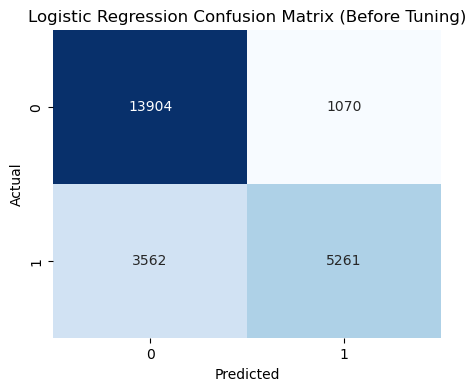

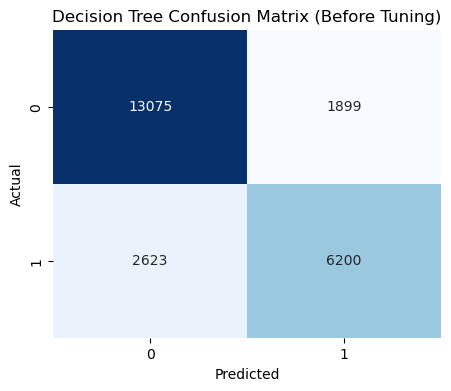

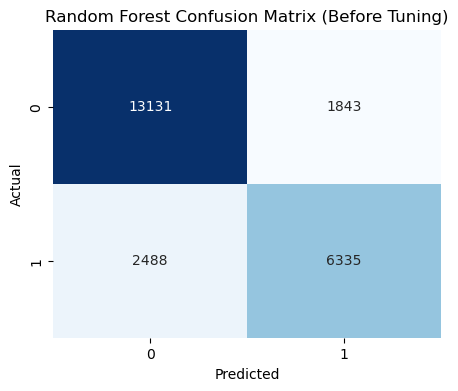

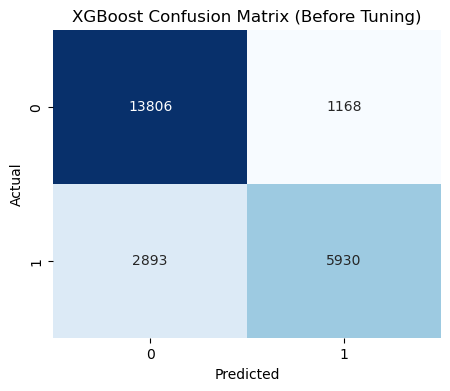

In [84]:
# Use predictions from original models
models_to_plot = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

for model_name in models_to_plot:
    y_pred = results[model_name]["preds"]
    plot_cm_heatmap(y_test, y_pred, model_name, title_suffix="(Before Tuning)")


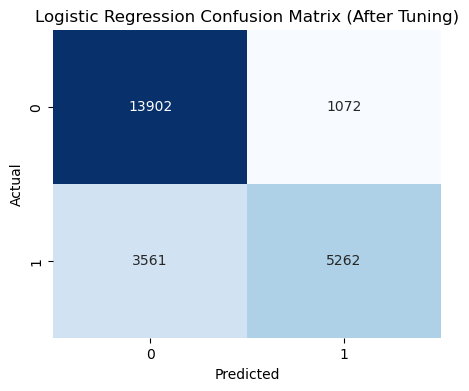

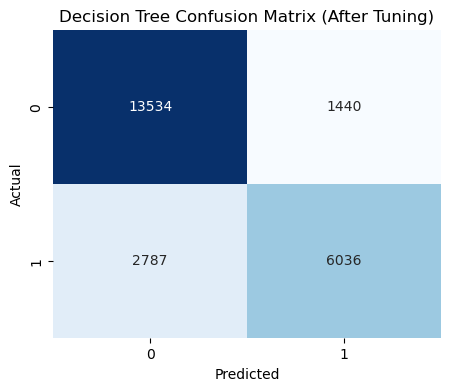

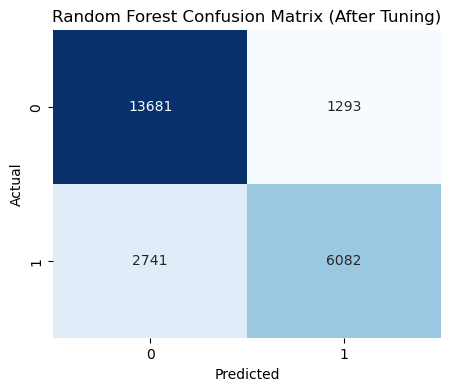

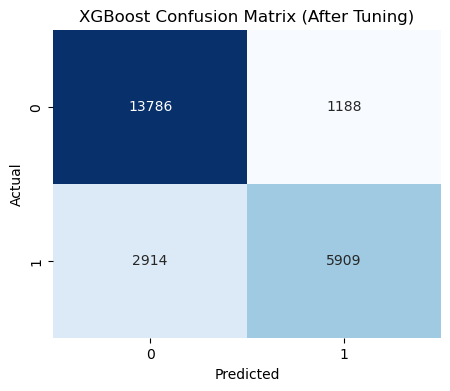

In [85]:
# Use predictions from tuned models
tuned_models = {
    "Logistic Regression": rs_logreg.best_estimator_,
    "Decision Tree": rs_dt.best_estimator_,
    "Random Forest": rs_rf.best_estimator_,
    "XGBoost": rs_xgb.best_estimator_
}

for model_name, model in tuned_models.items():
    y_pred_tuned = model.predict(X_test)
    plot_cm_heatmap(y_test, y_pred_tuned, model_name, title_suffix="(After Tuning)")


In [86]:

import pandas as pd
from sklearn.metrics import accuracy_score

# Original models (before tuning)
models_before = {
    "Logistic Regression": pipe_logreg,
    "Decision Tree": pipe_DT,
    "Random Forest": pipe_RF,
    "XGBoost": pipe_XGB
}

train_test_acc_before = {}
for name, model in models_before.items():
    model.fit(X_train, y_train)  # fit original pipeline
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_test_acc_before[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred)
    }

# Tuned models (after tuning)
tuned_models = {
    "Logistic Regression": rs_logreg.best_estimator_,
    "Decision Tree": rs_dt.best_estimator_,
    "Random Forest": rs_rf.best_estimator_,
    "XGBoost": rs_xgb.best_estimator_
}

train_test_acc_after = {}
for name, model in tuned_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_test_acc_after[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred)
    }


In [87]:
comparison = []

for model_name in models_before.keys():
    before_train = train_test_acc_before[model_name]["Train Accuracy"]
    before_test = train_test_acc_before[model_name]["Test Accuracy"]
    after_train = train_test_acc_after[model_name]["Train Accuracy"]
    after_test = train_test_acc_after[model_name]["Test Accuracy"]
    
    # Determine overfitting / underfitting
    def status(train, test):
        diff = train - test
        if diff > 0.05:
            return "Overfitting"
        elif diff < -0.05:
            return "Underfitting"
        else:
            return "Good Fit"
    
    comparison.append({
        "Model": model_name,
        "Train Acc Before": round(before_train, 3),
        "Test Acc Before": round(before_test, 3),
        "Status Before": status(before_train, before_test),
        "Train Acc After": round(after_train, 3),
        "Test Acc After": round(after_test, 3),
        "Status After": status(after_train, after_test)
    })

comparison_df = pd.DataFrame(comparison)
comparison_df


,Model,Train Acc Before,Test Acc Before,Status Before,Train Acc After,Test Acc After,Status After
0,Logistic Regression,0.808,0.805,Good Fit,0.808,0.805,Good Fit
1,Decision Tree,0.923,0.811,Overfitting,0.851,0.822,Good Fit
2,Random Forest,0.923,0.820,Overfitting,0.871,0.830,Good Fit
3,XGBoost,0.837,0.829,Good Fit,0.838,0.828,Good Fit


[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0; total time=   2.5s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0; total time=   2.5s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=50, algo__subsample=0.6; total time=   2.0s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.01, algo__max_depth=5, algo__n_estimators=50, algo__subsample=0.8; total time=   1.6s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.05, algo__max_depth=5, algo__n_estimators=200, algo__subsample=0.6; total time=   4.5s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.01, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.8; total time=   2.2s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.01, algo__max_depth=3, algo__n_estimators=100, algo__subsample=0.8; to

In [88]:
data_arif = {
    "nama" : "Arif",
    "Sex" : "male",
    "Age" : 28,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 200,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':1,
    'total_of_special_requests':1,
    'is_previously_cancelled':1,
    'is_repeated_guest':0,
    'is_booking_changes':0,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "arif@titanic.com"
}

arif = pd.DataFrame(data=data_arif, index=[1])


In [89]:
pipe_XGB.predict_proba(arif)


array([[0.9916238 , 0.00837617]], dtype=float32)

[CV] END algo__colsample_bytree=0.6, algo__learning_rate=0.01, algo__max_depth=10, algo__n_estimators=100, algo__subsample=0.6; total time=   4.6s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.1, algo__max_depth=10, algo__n_estimators=100, algo__subsample=1.0; total time=   3.4s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=100, algo__subsample=1.0; total time=   2.8s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=50, algo__subsample=0.6; total time=   1.8s
[CV] END algo__colsample_bytree=1.0, algo__learning_rate=0.2, algo__max_depth=7, algo__n_estimators=50, algo__subsample=0.6; total time=   1.8s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.01, algo__max_depth=5, algo__n_estimators=50, algo__subsample=0.8; total time=   1.6s
[CV] END algo__colsample_bytree=0.8, algo__learning_rate=0.01, algo__max_depth=5, algo__n_estimators=50, algo__subsample=0.8; tot

### Evaluation Comparing Each Models Evaluation Matrix 

### Testing With New Data

In [42]:
data_arif = {
    "nama" : "Arif",
    "Sex" : "male",
    "Age" : 28,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 200,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':1,
    'total_of_special_requests':1,
    'is_previously_cancelled':1,
    'is_repeated_guest':0,
    'is_booking_changes':0,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "arif@titanic.com"
}

arif = pd.DataFrame(data = data_arif, index = [1])
pipe_XGB.predict_proba(arif)

# we see that our model could predict new data that's outside the training and testing set 
# we use XGB and predict proba in this case, we that arif is 95% will likely to confirmed booking  

array([[0.9916238 , 0.00837617]], dtype=float32)

### Limitation & Future Research 




- The machine learning model in this notebook implemented data from **City & Resort Hotels** in Portugal, which raise some question that further research will help to explain:



- **1**.**Can a similar result obtained from hotel outside of portugal ?**
- **2. Can Model have a better result if more hotels are integrated into the machine learning modeling?**
- **3. Is the result only specific of the type of hotels integrated into this modeling?**


- **Situation Limitation**
    - all of this booking are recording during 2015 - 2017, however now in 2020 we have a pandemic that's going on **(Covid - 19)**, this model needs to be double checked for current situation wheter a similar result obtained after the pandemic 

#### Further Research

- For further research weather information, hotel factors (star of the hotels, brand, and etc) could be included into the dataset in hope to  improve the models and measure the importance of these features


- Additional research with different location, additional hotel could contribute to a better understanding of booking cancellations

### Exporting The Models

In [91]:
import joblib

# Save the tuned Random Forest pipeline
joblib.dump(rs_rf.best_estimator_, 'hotel_tuned.pkl')


['hotel_tuned.pkl']